# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

# Data & EDA

In [2]:
df = pd.read_csv('data/cars_multivariate.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.7+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


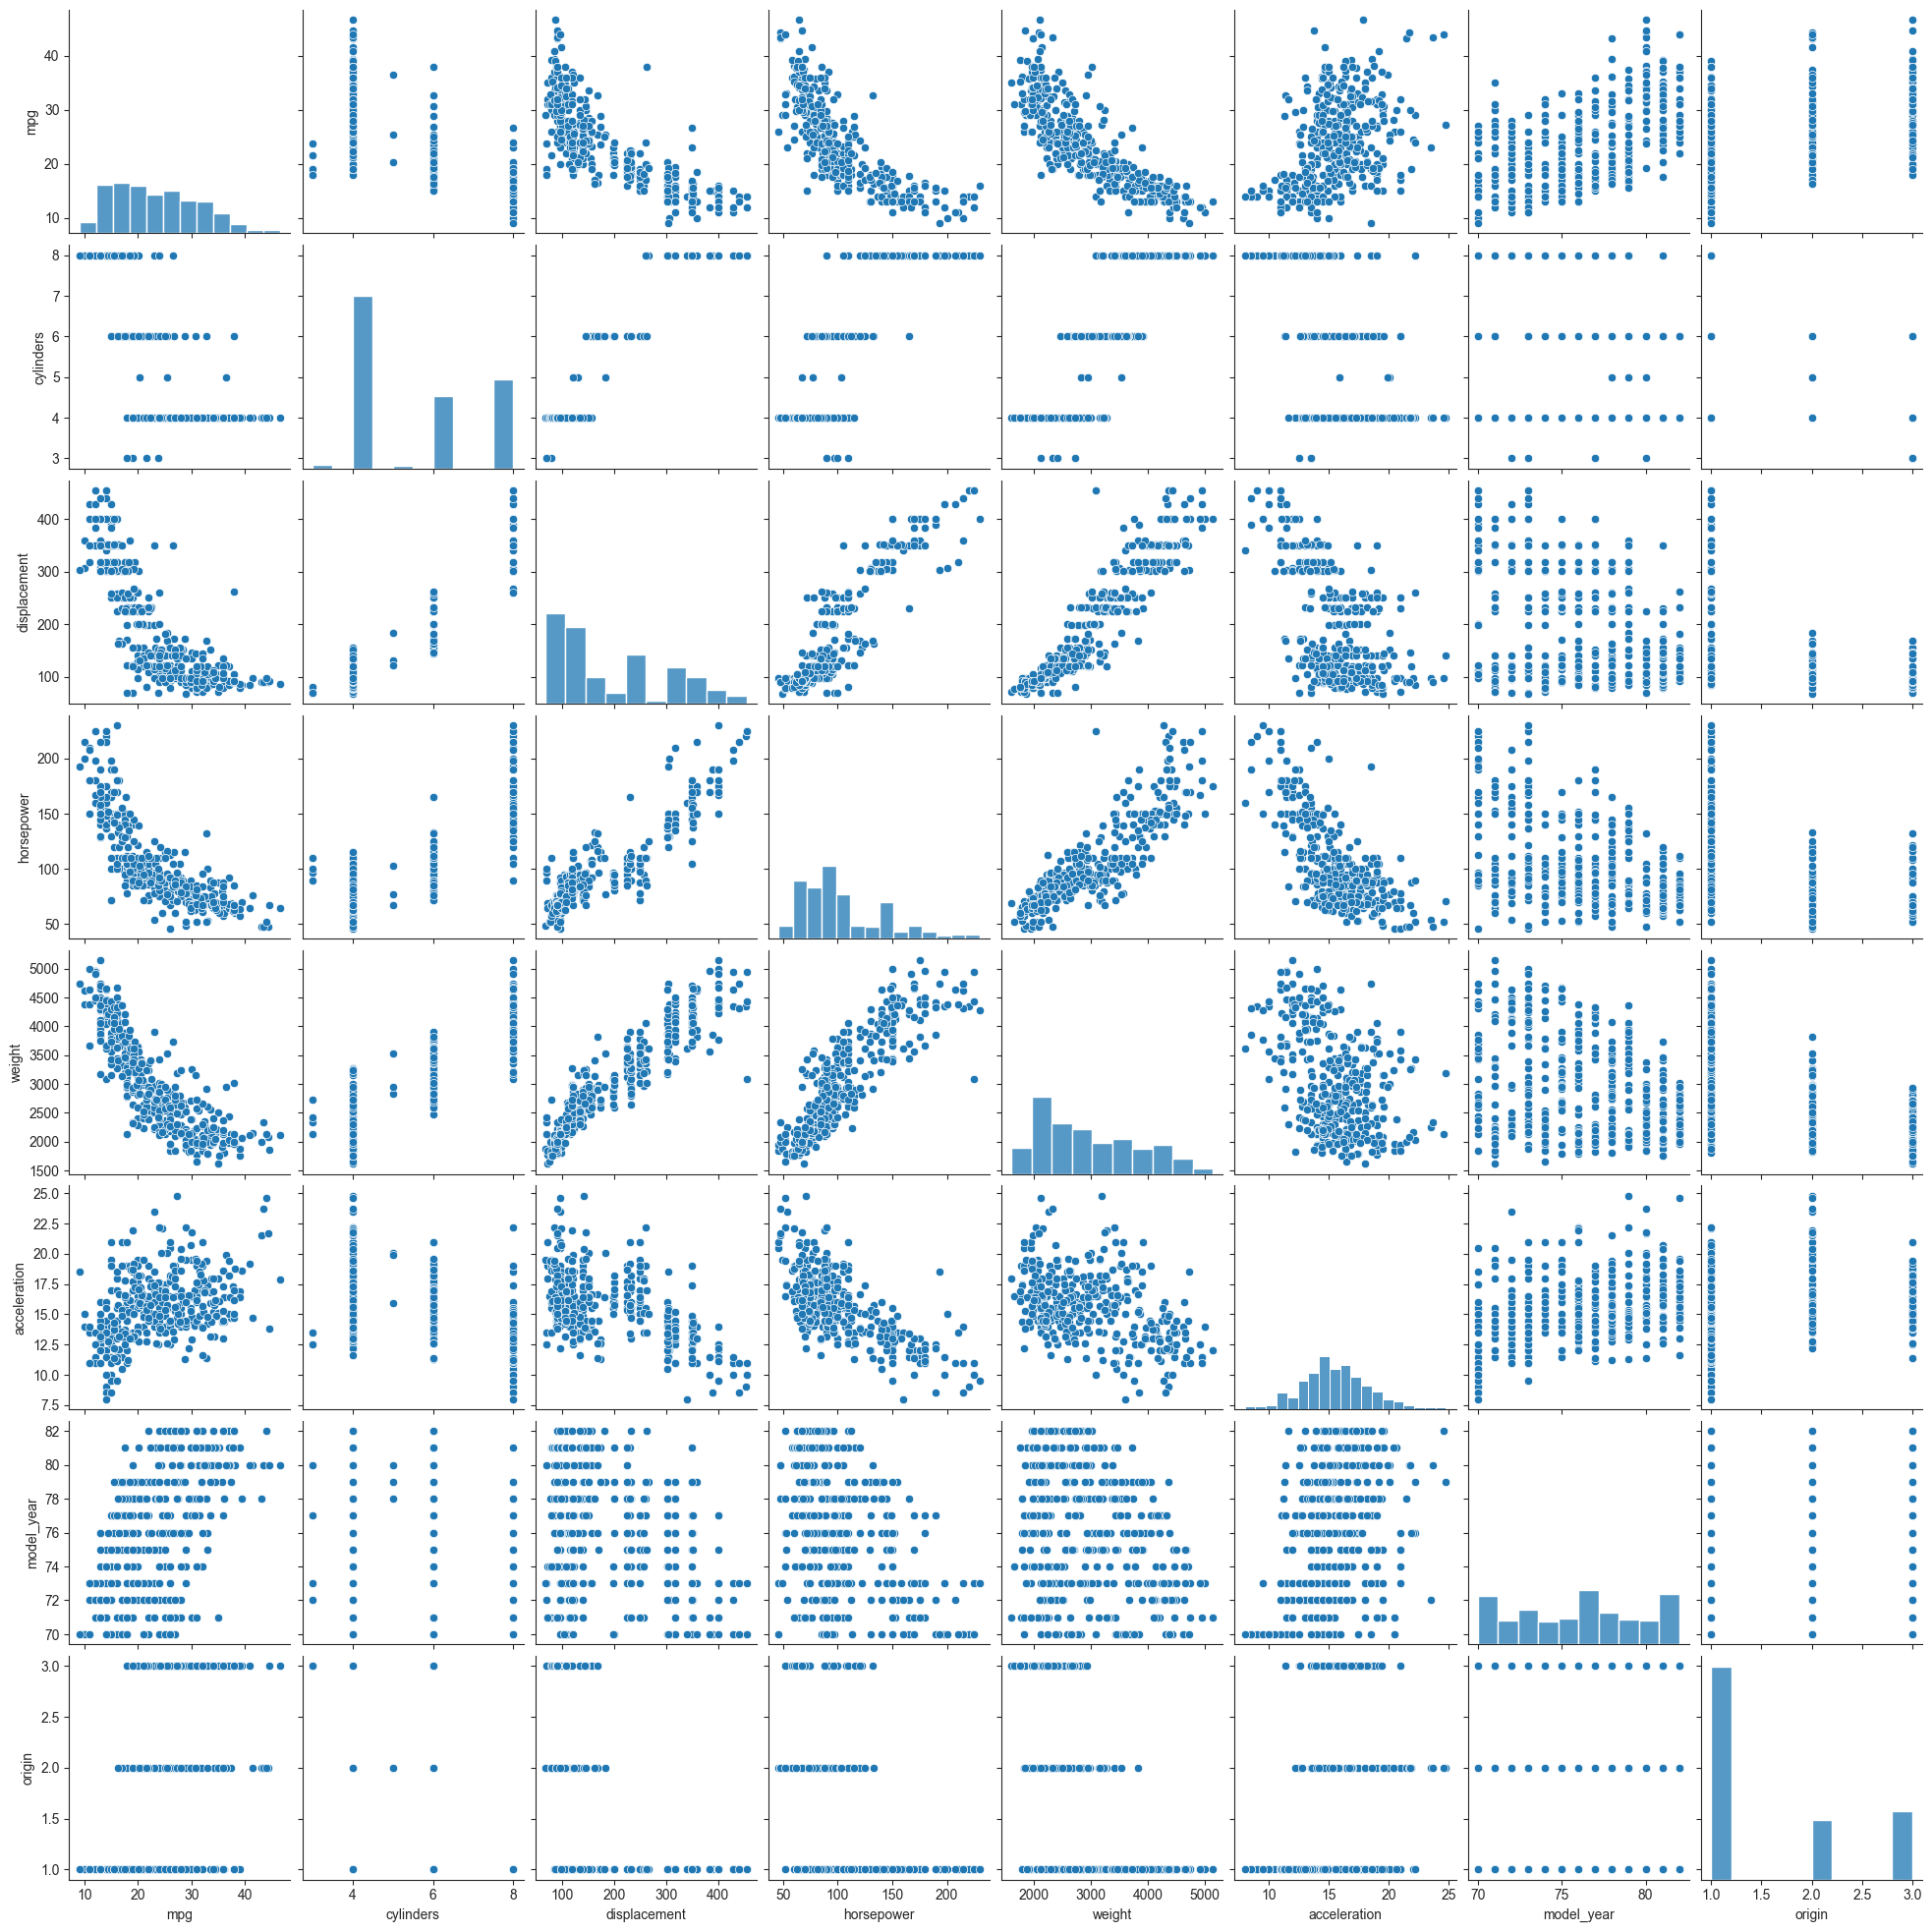

In [7]:
sns.pairplot(df)

## Baseline Model with Simple Linear Regression

Text(0.5, 0, 'horsepower')

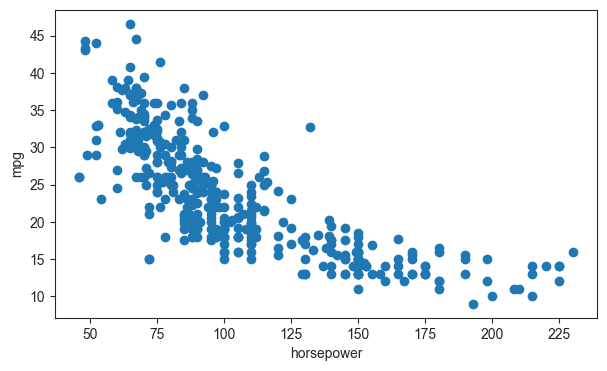

In [8]:
# We can see that our pairplot there is a relationship betweem hp and mpg

plt.scatter(df.horsepower, df.mpg)
plt.ylabel('mpg')
plt.xlabel('horsepower')

In [12]:
# Define feature and target variable 

X = df[['horsepower']]
y= df['mpg']

In [15]:
print('Shape of feature data', X.shape)
print('Shape of target variable', y.shape)

Shape of feature data (392, 1)
Shape of target variable (392,)


In [16]:
# Fit the linear regression model

lin_reg = LinearRegression()
lin_reg.fit(X,y)

# Calculare the R-Squared:

y_hat = lin_reg.predict(X)
print('R-Squared', r2_score(y,y_hat).round(3))

R-Squared 0.606


Text(0.5, 0, 'Horsepower')

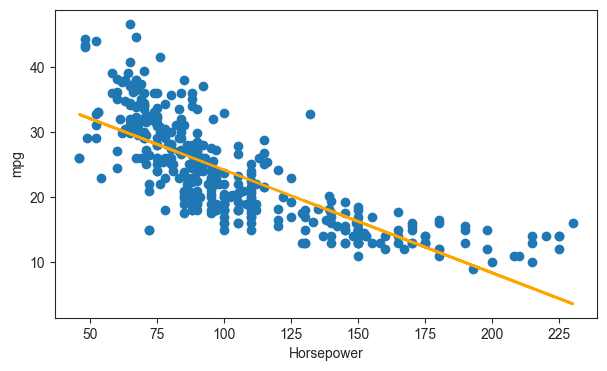

In [18]:
# Plot the data with regression line

plt.scatter(X,y)
plt.plot(X, y_hat, '-', color='orange', linewidth=2)
plt.ylabel('mpg')
plt.xlabel('Horsepower')

From our simple baseline model according to R-Squared, **horsepower** can explain 60.6% of the variance in our target variable. 

## Multiple Linear Regression

In [21]:
df_corr = df.drop('car_name', axis=1)

In [22]:
df_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


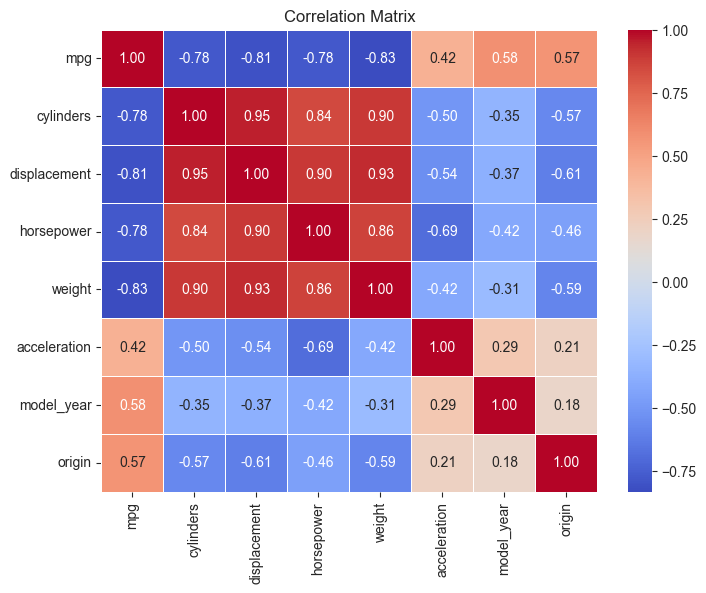

In [23]:
# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Define features and target for multiple regression 

X_multip = df[['horsepower', 'weight', 'cylinders', 'displacement']]
y_multip = df['mpg']

In [27]:
print('Shape of feature data', X_multip.shape)
print('Shape of target variable', y_multip.shape)

Shape of feature data (392, 4)
Shape of target variable (392,)


In [39]:
# Fit the data to LinearRegression model

lin_reg_mult = LinearRegression()
lin_reg_mult.fit(X_multip,y_multip)

#Calculate the intercep and coeff

intercept = lin_reg_mult.intercept_
coefficients = lin_reg_mult.coef_

print("Intercept:", intercept.round(4))
print("Coefficients:", coefficients.round(3))

#Calculate R-Squared

y_hat_mult = lin_reg_mult.predict(X_multip)
print('R-Squared:', r2_score(y_multip, y_hat_mult).round(3))

Intercept: 45.7568
Coefficients: [-0.043 -0.005 -0.393  0.   ]
R-Squared: 0.708


$$ \hat{mpg} = 45.7568 - 0.043 \times horsepower - 0.005 \times weight  -0.393 \times cylinders - 0.0001 \times displacement $$

In [42]:
# Define features and target for multiple regression 

X_multip_2 = df[['horsepower', 'weight', 'cylinders']]
y_multip_2 = df['mpg']

In [43]:
print('Shape of feature data', X_multip_2.shape)
print('Shape of target variable', y_multip_2.shape)

Shape of feature data (392, 3)
Shape of target variable (392,)


In [45]:
# Fit the data to LinearRegression model

lin_reg_mult = LinearRegression()
lin_reg_mult.fit(X_multip_2,y_multip_2)

#Calculate the intercep and coeff

intercept = lin_reg_mult.intercept_
coefficients = lin_reg_mult.coef_

print("Intercept:", intercept.round(4))
print("Coefficients:", coefficients.round(4))

#Calculate R-Squared

y_hat_mult_2 = lin_reg_mult.predict(X_multip_2)
print('R-Squared:', r2_score(y_multip_2, y_hat_mult_2).round(3))

Intercept: 45.7368
Coefficients: [-0.0427 -0.0053 -0.389 ]
R-Squared: 0.708


$$ \hat{mpg} = 45.7368 - 0.0427 \times horsepower - 0.0053 \times weight  -0.389 \times cylinders  $$

In [40]:
# Define function for calculating adjusted r-squared
def adjusted_r_squared(r_squared, X):
    adjusted_r2 = 1 - ((1 - r_squared) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [49]:
# Calculate Adjusted R-Squared for both model

model_one = adjusted_r_squared(0.606, X)
print(f'Adjusted R^2: {round(model_one,3)}')

model_two = adjusted_r_squared(0.708, X_multip)
print(f'Adjusted R^2: {round(model_two,3)}')

model_three = adjusted_r_squared(0.708, X_multip_2)
print(f'Adjusted R^2: {round(model_three,3)}')

Adjusted R^2: 0.605
Adjusted R^2: 0.705
Adjusted R^2: 0.706
